In [15]:
from datasets.datasetgetter import get_dataset, Compose
from datasets.custom_dataset import DatasetDumped, ImageFolderRemap
from PIL import Image
from IPython.display import display
import torch
from torchvision import transforms
from torchvision.transforms.functional import to_pil_image, to_tensor
import time

In [2]:
obj_path = '../font-dumped/characters.obj'

In [6]:
mean = [0.5]
std = [0.5]
normalize = transforms.Normalize(mean=mean, std=std)
img_size = 80
transform = Compose([transforms.Resize((img_size, img_size)),
                         transforms.ToTensor(),
                         normalize])

In [7]:
dataset = DatasetDumped(obj_path, transform, 1)

processed 100000 examples
processed 200000 examples
processed 300000 examples
unpickled total 312780 examples


In [8]:
data_loader = torch.utils.data.DataLoader(
        dataset,
        batch_size=32,
        shuffle=False,
        num_workers=8,
        pin_memory=True,
        drop_last=False)

In [11]:
start = time.time()
for (img, target_id) in iter(data_loader):
    pass
end = time.time()
print(end - start)

79.24093008041382


In [16]:
img_dir = '../font-images'
remap_table = {i: i for i in range(200)}
img_dataset = ImageFolderRemap(img_dir, transform=transform, remap_table=remap_table, input_ch=1)

In [17]:
img_data_loader = torch.utils.data.DataLoader(
    img_dataset,
    batch_size=32,
    shuffle=False,
    num_workers=8,
    pin_memory=True,
    drop_last=False)

In [19]:
start = time.time()
count = 0
for (img, target_id) in iter(img_data_loader):
    count += 1
    pass
end = time.time()
print(end - start)

73.31427192687988


In [20]:
print(count)

9775


In [5]:
img = Image.open('../font-images/id_0/0000.png')

In [9]:
rgb_img = img.convert('RGB')

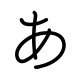

In [10]:
display(rgb_img)

In [8]:
type(rgb_img)

PIL.Image.Image

In [2]:
args = type("Piyo", (object,), {"img_size": 80, "att_to_use": [0,1,2,3], "data_dir": "../font-images", "val_num": 10, "input_ch": 1})

In [3]:
train_dataset, val_dataset = get_dataset(args)

USE CLASSES [0, 1, 2, 3]
LABEL MAP: {0: 0, 1: 1, 2: 2, 3: 3}
MINIMUM TRAIN DATA FONT : 2214
MAXIMUM TAIN DATA FONT : 2218


In [4]:
train_loader = torch.utils.data.DataLoader(train_dataset['TRAIN'], batch_size=8, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset)
it = iter(train_loader)
imgs, y_org = next(it)


ValueError: seek of closed file

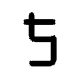

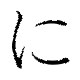

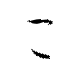

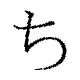

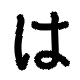

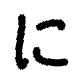

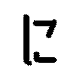

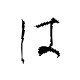

In [30]:
for i in range(imgs.shape[0]):
    display(transforms.ToPILImage()(imgs[i]).convert("RGB"))

8

In [31]:
import json

In [32]:
with open('joyokanji.json', 'r') as f:
    data = json.load(f)

In [37]:
character = ''.join(data['jp'])


In [39]:
with open('joyokanji.txt', 'w') as f:
    f.write(character)

In [41]:
img = Image.open('sample.png')

In [48]:
img_tensor = to_tensor(img)
img_tensor = (img_tensor + 1) / 2

In [49]:
arranged_img = to_pil_image(img_tensor)